## IMPORTING REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical ##to convert numerical variables to catagorical variables
from PIL import Image ##Python Imaging Library
import os
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import gradient_descent_v2
from sklearn.metrics import accuracy_score

ImportError: cannot import name 'gradient_descent_v2' from 'keras.optimizers' (c:\Program Files\Python39\lib\site-packages\keras\optimizers\__init__.py)

## DATA PREPROCESSING

In [35]:
data=[] #will contain all the images in the form of numpy array
classes=[] #will contain corresponding labels
number_classes=43
curr_path=os.getcwd() ##cwd-> current working directory
print(curr_path)

C:\Users\Vikas Singla\Desktop\ml project


In [36]:
for i in range(number_classes):
    path=os.path.join(curr_path,'train',str(i)) 
    images=os.listdir(path) ##list of all the files in the directory at the given path
    
    for img in images:
        try:
            arr=Image.open(path+"\\"+img) ##Image.open is used to open an image, returns an image object
            arr=arr.resize((30,30)) ##resizing required so that every image has same number of features
            arr=np.array(arr) ## convert the image into a numpy array of size 30*30*3, height=30, width=30, 3 stands for RGB parts of image 
            data.append(arr)
            classes.append(i)
        except:
            print("Error")

In [37]:
data=np.array(data) ##final data
classes=np.array(classes) ## corresponding labels

In [38]:
data.shape
## The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the 
## last 3 means the data contains colored images (RGB value).

(39209, 30, 30, 3)

In [39]:
X_train,X_dev,y_train, y_dev=train_test_split(data,classes,test_size=0.2,random_state=20)
## dev set size = 20% of whole data

In [40]:
print(X_train.shape,X_dev.shape,y_train.shape,y_dev.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [41]:
y_train=to_categorical(y_train, 43)
y_dev=to_categorical(y_dev, 43)
print(y_train.shape)
print(y_dev.shape)
print(y_train[0])

(31367, 43)
(7842, 43)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## CNN MODEL

In [42]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_dev, y_dev))

Epoch 1/15
981/981 [==============================] - 84s 84ms/step - loss: 1.5798 - accuracy: 0.6069 - val_loss: 0.2523 - val_accuracy: 0.9399
Epoch 2/15
981/981 [==============================] - 75s 76ms/step - loss: 0.4267 - accuracy: 0.8825 - val_loss: 0.1053 - val_accuracy: 0.9726
Epoch 3/15
981/981 [==============================] - 77s 78ms/step - loss: 0.2811 - accuracy: 0.9214 - val_loss: 0.1595 - val_accuracy: 0.9537
Epoch 4/15
981/981 [==============================] - 75s 76ms/step - loss: 0.2532 - accuracy: 0.9328 - val_loss: 0.0985 - val_accuracy: 0.9740
Epoch 5/15
981/981 [==============================] - 70s 72ms/step - loss: 0.2495 - accuracy: 0.9349 - val_loss: 0.0664 - val_accuracy: 0.9833
Epoch 6/15
981/981 [==============================] - 73s 74ms/step - loss: 0.2215 - accuracy: 0.9436 - val_loss: 0.0643 - val_accuracy: 0.9804
Epoch 7/15
981/981 [==============================] - 78s 80ms/step - loss: 0.2258 - accuracy: 0.9418 - val_loss: 0.0460 - val_accuracy:

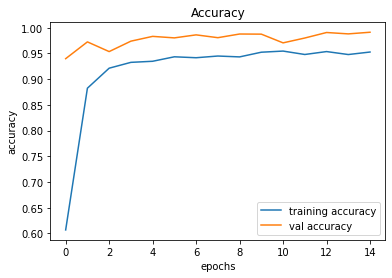

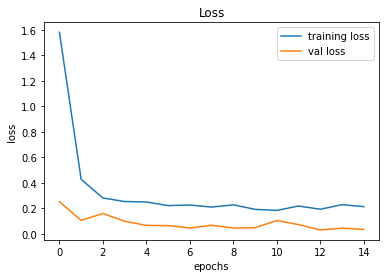

In [45]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## DATA PREPROCESSING FOR 2 LAYER NN

In [46]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_dev=X_dev.reshape(X_dev.shape[0],-1)

In [47]:
print("X_train's shape: " + str(X_train.shape))
print("X_dev's shape: " + str(X_dev.shape))

X_train's shape: (31367, 2700)
X_dev's shape: (7842, 2700)


In [48]:
def pre_process_data(x_train, x_dev):
   
    x_train = x_train / 255.
    x_dev = x_dev / 255.

    return x_train, x_dev

In [49]:
X_train, X_dev = pre_process_data(X_train, X_dev)

## 2 LAYER NN MODEL BUILDING

In [71]:
class ANN:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)

    def initialize_parameters(self):
        np.random.seed(1)

        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))

    def forward(self, X):
        store = {}

        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z

        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z

        return A, store

    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)

    def backward(self, X, Y, store):

        derivatives = {}

        store["A0"] = X.T

        A = store["A" + str(self.L)]
        dZ = A - Y.T

        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)

        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db

        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)

            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db

        return derivatives

    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)

        self.n = X.shape[0]

        self.layers_size.insert(0, X.shape[1])

        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T))
            derivatives = self.backward(X, Y, store)

            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]

            if loop % 100 == 0:
                print("Cost: ", cost)

            if loop % 10 == 0:
                self.costs.append(cost)

    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = accuracy_score(Y, y_hat)
        return accuracy * 100
    
    def predict1(self, X):
        A, cache = self.forward(X)
        return A

    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

In [51]:
layers_dims = [60, 43]

Cost:  0.08949308221083314
Cost:  0.07745642813937008
Cost:  0.0735985364078795
Cost:  0.06933341633613438
Cost:  0.06498915872258168
Cost:  0.060932064379474564
Cost:  0.05733457205310407
Cost:  0.0541780821942526
Cost:  0.05138242284996315
Cost:  0.04887498644307349
Train Accuracy: 50.15143303471802
Test Accuracy: 48.55904106095384


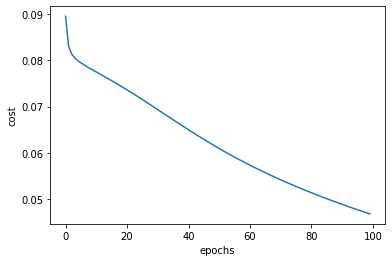

In [52]:
ann = ANN(layers_dims)
ann.fit(X_train, y_train, learning_rate=0.1, n_iterations=1000)
print("Train Accuracy:", ann.predict(X_train, y_train))
print("Test Accuracy:", ann.predict(X_dev, y_dev))
ann.plot_cost()

In [53]:
layers_dims = [70, 43]

Cost:  0.08741198402180383
Cost:  0.07298172744347783
Cost:  0.06404194205575822
Cost:  0.05629114814185578
Cost:  0.05034279016848007
Cost:  0.045610551476141126
Cost:  0.04166613678541638
Cost:  0.038278085248349934
Cost:  0.0353196734368171
Cost:  0.032716342028282754
Cost:  0.030419118065640207
Cost:  0.02838998925406257
Cost:  0.02659527936926383
Cost:  0.025003939852380325
Cost:  0.023587741755110594
Train Accuracy: 79.7557943061179
Test Accuracy: 78.79367508288702


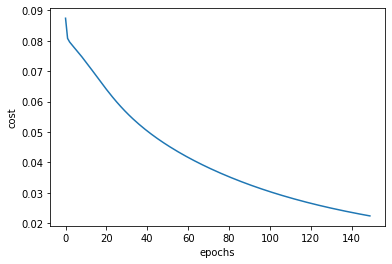

In [54]:
ann = ANN(layers_dims)
ann.fit(X_train, y_train, learning_rate=0.2, n_iterations=1500)
print("Train Accuracy:", ann.predict(X_train, y_train))
print("Test Accuracy:", ann.predict(X_dev, y_dev))
ann.plot_cost()

In [72]:
layers_dims = [70, 43]

Cost:  0.08741198402180383
Cost:  0.06854270348153786
Cost:  0.056319633685875226
Cost:  0.04787832799915461
Cost:  0.041683436988265835
Cost:  0.03804509485298783
Cost:  0.033071482078617064
Cost:  0.029826315976207458
Cost:  0.02710366400869446
Cost:  0.024819650829490187
Cost:  0.022869363352230918
Cost:  0.02118787543235034
Cost:  0.019714737655616113
Cost:  0.01857583547243129
Cost:  0.01771070725551645
Cost:  0.01628826232824275
Cost:  0.01534880529203678
Cost:  0.014765543642025333
Cost:  0.013757360716312917
Cost:  0.013054430499966244
Train Accuracy: 89.39012337807249
Test Accuracy: 88.37031369548585


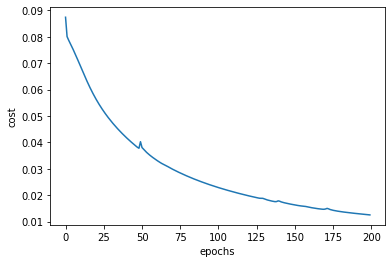

In [73]:
ann = ANN(layers_dims)
ann.fit(X_train, y_train, learning_rate=0.3, n_iterations=2000)
print("Train Accuracy:", ann.predict(X_train, y_train))
print("Test Accuracy:", ann.predict(X_dev, y_dev))
ann.plot_cost()

## TESTING OUR MODEL

In [57]:
df = pd.read_csv("Test.csv")
y_test = df['ClassId'].values
paths = df['Path'].values

In [58]:
data=[]
for path in paths:
    image = Image.open(path)
    image = image.resize((30,30))
    data.append(np.array(image))

x_test = np.array(data)
print(x_test.shape)

(12630, 30, 30, 3)


In [59]:
pred = model.predict(x_test)
classes = np.argmax(pred,axis=1)

395/395 [==============================] - 5s 11ms/step


In [60]:
print(accuracy_score(y_test, classes))

0.9653998416468725


## TESTING 2 LAYER NN ON TEST SET

In [74]:
X_test = x_test.reshape(x_test.shape[0],-1)
X_test = X_test/255
Y_test = to_categorical(y_test, 43)

In [75]:
print(X_test.shape)
print(Y_test.shape)

(12630, 2700)
(12630, 43)


In [76]:
ann.predict(X_test, Y_test)

81.1243072050673

## SAVING OUR MODEL

In [64]:
model.save('model.h5')

## GUI

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('model.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])
    c = np.argmax(pred, axis=1)
    sign = classes[c[0]+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 415ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - 0s 27ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - ETA: 0s

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - 0s 25ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 

1/1 [==============================] - ETA: 0s

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - 0s 23ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - 0s 24ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - 0s 24ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 

1/1 [==============================] - 0s 27ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined
Exception in Tkinter callback


1/1 [==============================] - 0s 28ms/step


Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.arg

1/1 [==============================] - 0s 25ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 

1/1 [==============================] - ETA: 0s

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - 0s 28ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - ETA: 0s

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - ETA: 0s

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


1/1 [==============================] - 0s 16ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 

1/1 [==============================] - 0s 16ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\tkinter\__init__.py", line 1885, in __call__
    return self.func(*args)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 72, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Vikas Singla\AppData\Local\Temp\ipykernel_9860\29865458.py", line 67, in classify
    c = np.argmax(pred, axis=1)
NameError: name 'np' is not defined


In [82]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('model.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image.reshape(image.shape[0],-1)
    image = image/255
    pred = ann.predict1(image)
    c = np.argmax(pred, axis=0)
    sign = classes[c[0]+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Right-of-way at intersection
